In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10, MNIST
from torchvision.transforms import ToTensor, ToPILImage

import matplotlib.pyplot as plt

from collections import Counter
from functools import partial
from pathlib import Path
import requests
import os
import shutil
from tqdm import tqdm

ModuleNotFoundError: No module named 'tqdm'

In [4]:
DATASET = "CIFAR10" # CIFAR10, MNIST

if DATASET == "CIFAR10":
  image_width = 32
  color_channels = 3

  train_dataset = CIFAR10(
      root = "./datasets",
      transform = ToTensor(),
      train = True,
      download = True)
  test_dataset = CIFAR10(
      root = "./datasets",
      transform = ToTensor(),
      train = False,
      download = True)
  train_dataloader = DataLoader(
      dataset=train_dataset,
      batch_size = 512,
      shuffle=True)
  test_dataloader = DataLoader(
      train_dataset,
      batch_size = 512,
      shuffle=True)

  label_to_idx = train_dataset.class_to_idx
  idx_to_label = {idx:label for label, idx in label_to_idx.items()}
elif DATASET == "MNIST":
  pass

100.0%


Extracting ./datasets/cifar-10-python.tar.gz to ./datasets
Files already downloaded and verified


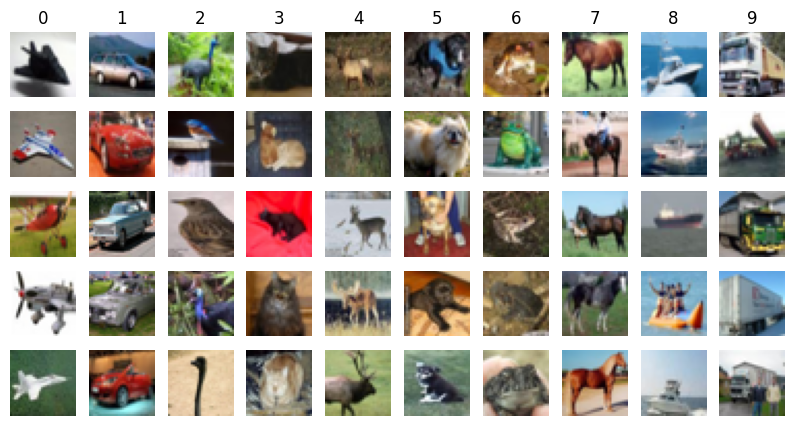

In [15]:
# Get 10 sample images from each class
fig, axs = plt.subplots(5, 10, figsize=(10,5))
counter = Counter()
i=0
while counter.total() < 50:
  img, label = train_dataset[i]
  i += 1
  if counter[label] < 5:
    ax = axs[counter[label], label]
    counter[label] += 1

    ax.axis('off')
    ax.imshow(img.permute(1, 2, 0))

    if counter[label] == 1:
      ax.set_title(f"{label}")

plt.show()

## Forward process

In [24]:
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6744370962213957..1.7390068842106345].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9381912769584694..1.9590202703964539].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1924153771208224..2.316115195898888].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8438723152558139..2.486255198738601].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.648007397435274..2.9388474888958136].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9056331160371383..3.285764103962801].
Clipping input data to the

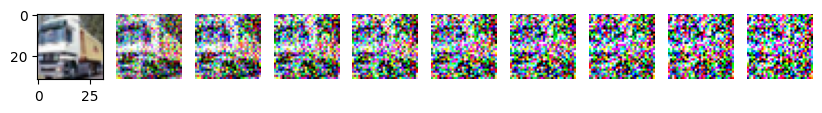

In [74]:
T = 10
x0 = train_dataset[1][0] / 255

fig, axs = plt.subplots(1, T, figsize=(10,5))
axs[0].imshow(255 * x0.permute(1, 2, 0))

xt = x0

for t in range(1, T):
    beta = 1e-5 / (T-t+1)
    xt = xt * np.sqrt(1-beta) + np.sqrt(beta) * np.random.randn(*xt.shape)
    ax = axs[t]
    
    ax.axis('off')
    ax.imshow(255 * xt.permute(1, 2, 0))
    

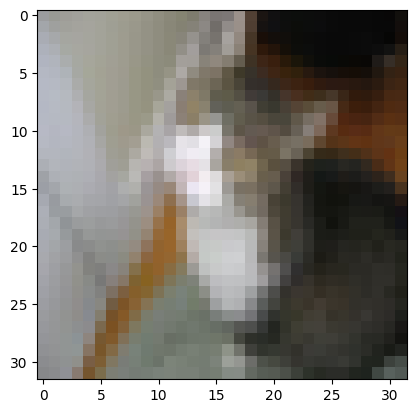

In [21]:
plt.imshow(x0.permute(1, 2, 0))